Профессия Data Science => Блок 1. Знакомство с данными. Python для анализа данных => PYTHON-13. Визуализация данных

In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.subplots as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
churn_data = pd.read_csv('data/churn.csv')
churn_data_df = churn_data.copy() #Создаём копию

Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Анализ Данных

In [10]:
# Анлизируем Ушедших клиентов
categories = [1]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]

# Создаем сетку для графиков 2x2
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("CreditScore", "Age", "Tenure", "Balance"))

# Создаем графики
fig.add_trace(px.box(box_data, x='CreditScore', color='Exited', facet_row='Exited').data[0], row=1, col=1)
fig.add_trace(px.box(box_data, x='Age', color='Exited', facet_row='Exited').data[0], row=1, col=2)
fig.add_trace(px.box(box_data, x='Tenure', color='Exited', facet_row='Exited').data[0], row=2, col=1)
fig.add_trace(px.box(box_data, x='Balance', color='Exited', facet_row='Exited').data[0], row=2, col=2)

# Настройка подписей осей и заголовка
fig.update_xaxes(title_text='CreditScore', row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_xaxes(title_text='Tenure', row=2, col=1)
fig.update_xaxes(title_text='Balance', row=2, col=2)

fig.update_yaxes(title_text='Значение', row=1, col=1)
fig.update_yaxes(title_text='Значение', row=1, col=2)
fig.update_yaxes(title_text='Значение', row=2, col=1)
fig.update_yaxes(title_text='Значение', row=2, col=2)

fig.update_layout(title_text='Ушедшие клиенты')

# Отобразите графики
fig.show()

In [11]:
# Анализируем оставшихся клиентов
categories = [0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]

# Создаем сетку для графиков 2x2
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("CreditScore", "Age", "Tenure", "Balance"))

# Создаем графики
fig.add_trace(px.box(box_data, x='CreditScore', color='Exited', facet_row='Exited').data[0], row=1, col=1)
fig.add_trace(px.box(box_data, x='Age', color='Exited', facet_row='Exited').data[0], row=1, col=2)
fig.add_trace(px.box(box_data, x='Tenure', color='Exited', facet_row='Exited').data[0], row=2, col=1)
fig.add_trace(px.box(box_data, x='Balance', color='Exited', facet_row='Exited').data[0], row=2, col=2)

# Настройка подписей осей и заголовка
fig.update_xaxes(title_text='CreditScore', row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_xaxes(title_text='Tenure', row=2, col=1)
fig.update_xaxes(title_text='Balance', row=2, col=2)

fig.update_yaxes(title_text='Значение', row=1, col=1)
fig.update_yaxes(title_text='Значение', row=1, col=2)
fig.update_yaxes(title_text='Значение', row=2, col=1)
fig.update_yaxes(title_text='Значение', row=2, col=2)

fig.update_layout(title_text='Лояльные клиенты')

# Отобразите графики
fig.show()

Можно сделат вывод, что Лояльные клиены:
1. Либо недавно обслуживаются в банке; либо имеют большой клиентский стаж по сравнения с НЕ лояльными;
2. Более молодые по сравнению с НЕ лояльными;
3. Имеют большие число малых депозитов по сравнению с НЕ лояльными

Подготовка данных:
1. Иследуем данные на предмет дубликатов;
2. Удаляем ненужные столбцы;
3. Присваиваем данным признак категории;
3. Исследуем данные на предмет статистических выбросов.

In [12]:
# Иследуем данные на предмет дубликатов;
print(churn_data_df[churn_data_df.duplicated()])

"""if 'CustomerId' in churn_data_df.columns:
    duplicates_in_column = churn_data_df[churn_data_df['CreditScore'].duplicated(subset='CreditScore')]
    print(duplicates_in_column)"""

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


"if 'CustomerId' in churn_data_df.columns:\n    duplicates_in_column = churn_data_df[churn_data_df['CreditScore'].duplicated(subset='CreditScore')]\n    print(duplicates_in_column)"

In [13]:
#1. Удаляем ненужные столбцы:
if 'RowNumber' in churn_data_df.columns: churn_data_df.drop('RowNumber', axis=1, inplace=True)
if 'CustomerId' in churn_data_df.columns: churn_data_df.drop('CustomerId', axis=1, inplace=True)
if 'Surname' in churn_data_df.columns: churn_data_df.drop('Surname', axis=1, inplace=True)

In [14]:
# Удаляем ненужные строки
# На основании данных о распределения возраста Лояльных клиентов исключим из таблицы данные о  клиентах за 75-й квантилью
# Условие для удаления строк
condition = (churn_data_df['Age'] > 56) & (churn_data_df['Exited'] == 0)
# Удаление строк, удовлетворяющих условию
churn_data_df = churn_data_df.drop(churn_data_df[condition].index)

# Условие для удаления строк
condition = (churn_data_df['Age'] > 70) & (churn_data_df['Exited'] == 1)
# Удаление строк, удовлетворяющих условию
churn_data_df = churn_data_df.drop(churn_data_df[condition].index)

Задание 9.1.    
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

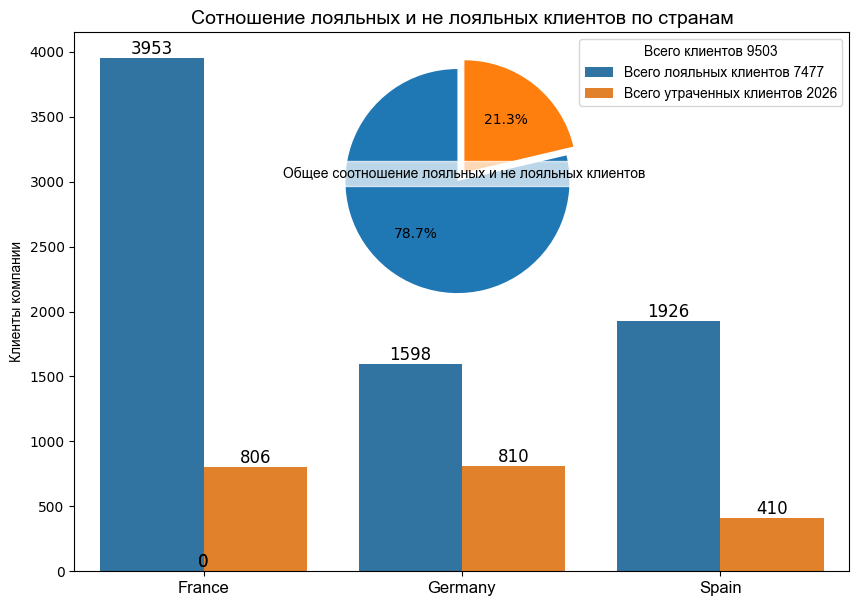

In [15]:
# Группируем данные по 'Geography' и 'Exited', а затем считаем количество строк в каждой группе
grouped_counts = churn_data_df.groupby(['Geography', 'Exited']).size().reset_index(name='Count')
vacc_country = churn_data_df['Exited'].value_counts().sort_values(ascending=False)

# Создаем столбчетый график
fig = plt.figure(figsize = (10, 7))
barplot = sns.barplot(
    data = grouped_counts,
    x = 'Geography',
    y = 'Count',
    hue = 'Exited',
)

"""Оформление основного графика"""
#treemap_data.columns = ['Geography', 'count']
#убираем подпись по "х"
barplot.set_xlabel('')

#форматируем подписи столбцов
font_properties = {'family': 'Arial', 'size': 12}
x_axis_labels = barplot.get_xticklabels()
for label in x_axis_labels:
    label.set_fontproperties(font_properties)

#задаём подпись по "y"
barplot.set_ylabel('Клиенты компании', fontdict={'fontname': 'Arial'})
#заголовок базового графика
barplot.set_title('Cотношение лояльных и не лояльных клиентов по странам', fontdict={'fontname': 'Arial', 'size': 14})
# Получаем легенду графика столбчатой диаграммы
legend = barplot.get_legend()

#заголовок легенды 
num_rows_legend = churn_data_df.shape[0]
legend.set_title('Всего клиентов ' + str(num_rows_legend))

# Получаем объект легенды
legend = barplot.get_legend()
# Устанавливаем заголовок легенды с учетом шрифта
num_rows_legend = churn_data_df.shape[0]
legend.get_title().set_fontsize(10)  # Размер шрифта
#legend.get_title().set_fontweight('bold')  # Жирный шрифт
legend.get_title().set_fontname('Arial')  # Установка шрифта


# Подписи в легенде
num_rows_1 = "Всего лояльных клиентов " + str(churn_data_df[churn_data_df['Exited'] == 0].shape[0])
num_rows_2 = "Всего утраченных клиентов " + str(churn_data_df[churn_data_df['Exited'] == 1].shape[0])
# Создайте параметры шрифта для подписей в легенде
font_properties = {'family': 'Arial'}
new_labels = [num_rows_1, num_rows_2]
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
    text.set_fontproperties(font_properties)

#изменяем размер и расположение на количественных подписей столбцов
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

"""Оформление Круговой диаграмы"""
#положение на основном графике
insert_axes = fig.add_axes([0.34, 0.48, 0.35, 0.4])
#данные и отображение
insert_axes.pie(vacc_country, autopct='%1.1f%%', startangle=90, explode = [0.1, 0],)
#подпись круговой диаграмы
insert_axes.set_xlabel('Общее соотношение лояльных и не лояльных клиентов',
                       labelpad=-105, fontsize=10, backgroundcolor=(1, 1, 1, 0.7),
                       fontdict={'fontname': 'Arial'})
#insert_axes.axis('equal')  # Для круговой диаграммы

plt.show()

Ответ на задание 9.1.   
При анализе данных было замечено что данные по лояльности клиентов сильно различаются по странам.
При дальнейшем анализе нужно учесть специфику по странам.
Так же, при подготовке данных была обнаружена связь между возрастом клиентов и их лояльностью.
В дальнейшем имеет смысл проанализировать каждую страну отдельно на предмет взаимомвязи возраста клиена и лояльности.

Задание 9.2.    
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.   
Опишите распределение и сделайте выводы.

In [26]:
#Выделяем клиентов с балансами более 2500$
scatter_data = churn_data_df[churn_data_df['Balance'] > 2500]

#Создаём дополнительный признак, страна с лояльными или не лояльными клиентами
scatter_data[['Exited_str']] = scatter_data[['Exited']].astype('str')
scatter_data["Geography_loyal"] = scatter_data["Geography"] + scatter_data["Exited_str"]

fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'Age', #ось абсцисс
    y = 'Balance', #ось ординат
    z = 'Geography_loyal', #ось аппликат
    color='Geography_loyal', #расцветка
    log_x=False, 
    log_y=False,
    width=1000,
    height=700,
)
fig.update_traces(marker=dict(size=2)) 
fig.update_layout(
    title="Кореляции пользователей, с балансами больше 2 500 долларов,<br>с Возрастом, Лояльностью, Страной <br> суфикс НОЛЬ означает лояльную выборку <br> суфикс ОДИН означает утраченную выборку",
    legend_title="",
    # Другие параметры макета, если нужно
)


#отображаем график
fig.show();

C:\Users\nigilist\AppData\Local\Temp\ipykernel_12096\2909878761.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nigilist\AppData\Local\Temp\ipykernel_12096\2909878761.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ответ на задание 9.2.   
Страны в которые выделенны клиенты с суфиксом "1" т.е. потерянныне демонстрируют:
1. В Германии минимальный разброс ушедших клиентов с балансами выше 2500 долларов приблизительно 60т. - 80т.;
2. Учитывая данные предыдущего графика из которого явно видно что и в процентном и в количественном отношении
больше всего теряет имено Германия, можно сделать вывод клиентам в Германии с депозитами 60т. - 80т. 
созданы некомфортные условия. Особенно этот фактор влияет на клиентов старше 55.

Задание 9.3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [27]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'Balance', color='Exited')
fig.show()

Ответ на задание 9.3    
 Вывод достаточно очевиден, Банку более лояльны клиенты с маленькими депозитами.
Клиенты с депозитами, приблизительно, более 35тыс. склонны уйти. 

Задача 9.4.     
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?       
На какую возрастную категорию клиентов стоит обратить внимание банку?

In [28]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'Age', color='Exited')
fig.show()

Ответ на задание 9.4.       
Данные подтверждают, выводы сделанные из трёхмерного графика.
Клиены старше 40 лет приемущественно НЕ лояльны.

Задание 9.5.        
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.     
 Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

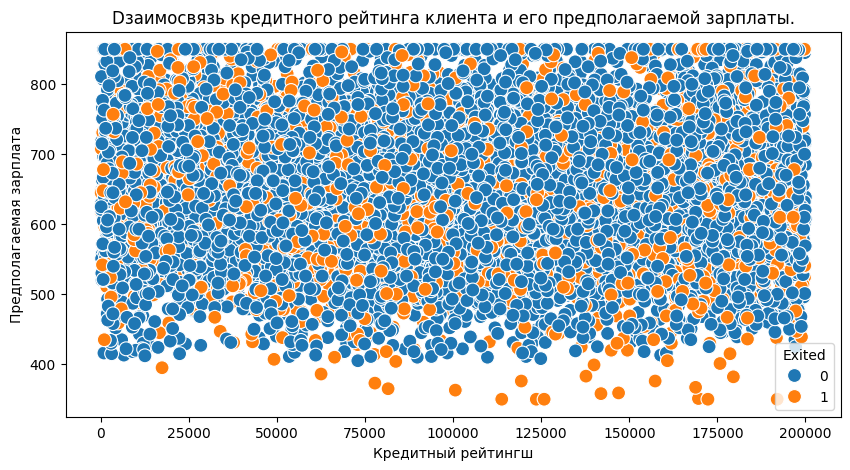

In [29]:
scatter_data_9_5 = churn_data_df

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data = scatter_data_9_5,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    hue ='Exited',
    s=100,
    #size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Dзаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.', fontsize=12)
scatterplot.set_xlabel('Кредитный рейтингш')
scatterplot.set_ylabel('Предполагаемая зарплата');

Ответ на задание 9.5        
Кореляций кредитного рейтинга клиента с его предполагаемой зарплатой НЕ наблюдается

In [30]:
#Эта переменная будет использоваться в последующи графиках
churn_data_df_exited = churn_data_df[churn_data_df["Exited"]==1]

Задание 9.6.        
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

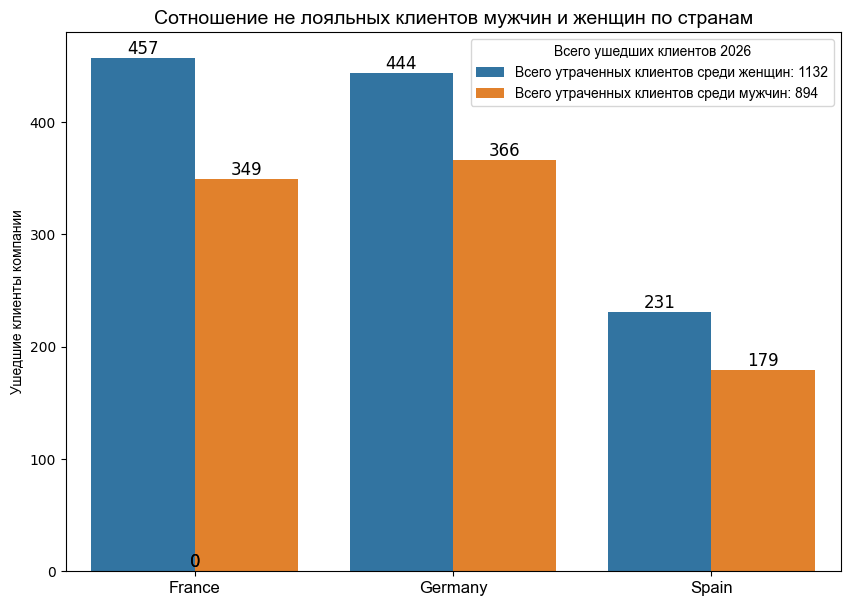

In [31]:
# Подготавливаем данные по 'Geography' и 'Exited', а затем считаем количество строк в каждой группе
grouped_counts_9_6 = churn_data_df_exited.groupby(['Geography', 'Gender']).size().reset_index(name='Count')
grouped_counts_9_6.groupby(['Geography', 'Gender']).size().reset_index(name='Count')
##vacc_country = grouped_counts_9_6['Gender'].value_counts().sort_values(ascending=False)

# Создаем столбчетый график
fig = plt.figure(figsize = (10, 7))
barplot = sns.barplot( data = grouped_counts_9_6, x = 'Geography', y = 'Count', hue = 'Gender',)

"""Оформление основного графика"""
#заголовок базового графика
barplot.set_title('Cотношение не лояльных клиентов мужчин и женщин по странам', fontdict={'fontname': 'Arial', 'size': 14})

#убираем подпись по "х"
barplot.set_xlabel('')

#задаём подпись по "y"
barplot.set_ylabel('Ушедшие клиенты компании', fontdict={'fontname': 'Arial'})

#форматируем подписи столбцов
font_properties = {'family': 'Arial', 'size': 12}
x_axis_labels = barplot.get_xticklabels()
for label in x_axis_labels:
    label.set_fontproperties(font_properties)

# Получаем легенду графика столбчатой диаграммы
legend = barplot.get_legend()
# заголовок легенды 
num_rows_legend = churn_data_df[churn_data_df["Exited"] == 1].shape[0]
legend.set_title('Всего ушедших клиентов ' + str(num_rows_legend))
legend.get_title().set_fontsize(10)
legend.get_title().set_fontname('Arial')

# Подписи в легенде
num_rows_2 = "Всего утраченных клиентов среди мужчин: " + str(churn_data_df[(
    churn_data_df['Exited'] == 1) & (churn_data_df['Gender'] == "Male")].shape[0])
num_rows_1 = "Всего утраченных клиентов среди женщин: " + str(churn_data_df[(
    churn_data_df['Exited'] == 1) & (churn_data_df['Gender'] == "Female")].shape[0])

# Создайте параметры шрифта для подписей в легенде
font_properties = {'family': 'Arial'}
new_labels = [num_rows_1, num_rows_2]
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
    text.set_fontproperties(font_properties)

#изменяем размер и расположение на количественных подписей столбцов
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

plt.show()

Оnвет на задание 9.6.       
Жtнщины оказываются НЕ лочльными бану несклько чаще чем муэжчины,       
при этом видно что пропорция между НЕ лояльными банку мужчинами и женщинами примерно одинаковая во всем странах.

Задание 9.7.        
Как отток клиентов зависит от числа приобретённых у банка услуг?        
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [32]:
"""Считаю что что использовать многоуровневую столбчатую диаграмму не целесообразно"""
"""Применю диаграму плоское дерево"""

grouped_counts_9_6 = churn_data_df_exited['NumOfProducts'].value_counts().reset_index()
grouped_counts_9_6.columns = ['NumOfProducts', 'count']

# Сортируем данные по количеству упоминаний (строк)
grouped_counts_9_6 = grouped_counts_9_6.sort_values(by='count', ascending=False)

#строим график
fig = px.treemap(
    data_frame = grouped_counts_9_6, #датафрейм
    path=['NumOfProducts'], #кат. признак, для которого строится график
    values='count',
    height=500, #высота
    width=700, #ширина
    title='Отток клиентов от числа приобретённых у банка услуг<br>Считаю что что использовать многоуровневую <br>столбчатую диаграмму не целесообразно' #заголовок
)

#отображаем его
fig.show()

Ответ на задание Задача 9.7.        
Очевидно, чем меньшим объёмом услуг пользуются клиенты тем выше вероятность ухода

Задача 9.8.     
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

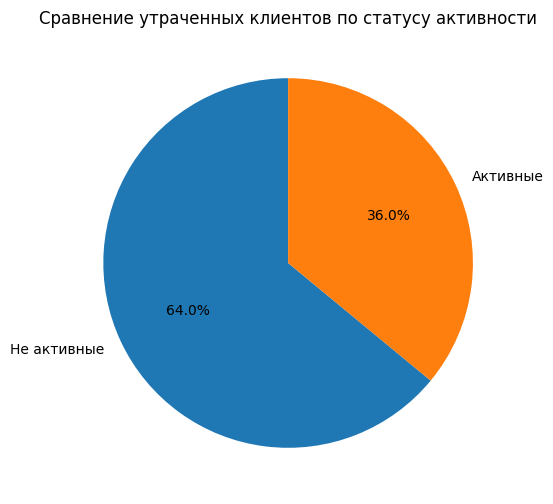

In [33]:
# Группируем данные по 'IsActiveMember' и считаем количество клиентов в каждой категории
active_member_counts = churn_data_df_exited['IsActiveMember'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
labels = ['Не активные', 'Активные'] 
plt.pie(active_member_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Сравнение утраченных клиентов по статусу активности')

plt.show()

Ответ на задание 9.8.       
Для уменьшения оттока среди Не активных следует Вовлекть Клиентов в использование продуктов банка.

Задача 9.9      
В какой стране доля ушедших клиентов больше?        
Постройте тепловую картограмму, которая покажет это соотношение на карте мира.      
Предположите, с чем это может быть связано.

In [34]:
# Группируем данные по странам и считаем долю ушедших клиентов
grouped_counts_9_9 = churn_data_df.groupby('Geography')['Exited'].mean().reset_index()

# Создаем тепловую карту
fig = px.choropleth(
    grouped_counts_9_9,
    locations = 'Geography',
    locationmode = "country names",
    color = 'Exited',
    color_continuous_scale = "RdYlBu",  # Изменяем градиент цветов на RdYlBu
    title = 'Доля ушедших клиентов по странам',
    labels = {'Exited': 'Доля ушедших клиентов'},
    width = 800,
    center = {'lat': 41.8719, 'lon': 12.5674},
    projection = 'natural earth',
)
#уровень (масштабирования)
fig.update_geos(projection_scale=5)

# Отображаем тепловую карту
fig.show()

Ответ на задание 9.9.       
Данный график подтверждает выводы сделанные в залании 9.2.      
Самые большие потери клиентов в Германии Так же эта стана характеризуется низким количеством малых депозитов        
среди  и возрастом выше среднего не лояльных клиентов.      
Можно предположить что в Германии много состоятельных пожелых людей, и именно этой категории клиентов сервис банка небодходит.

Задача 9.10.        
Переведите числовой признак CreditScore в категориальный.       
 Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже.      
  Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет,      
 в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией.     
 Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

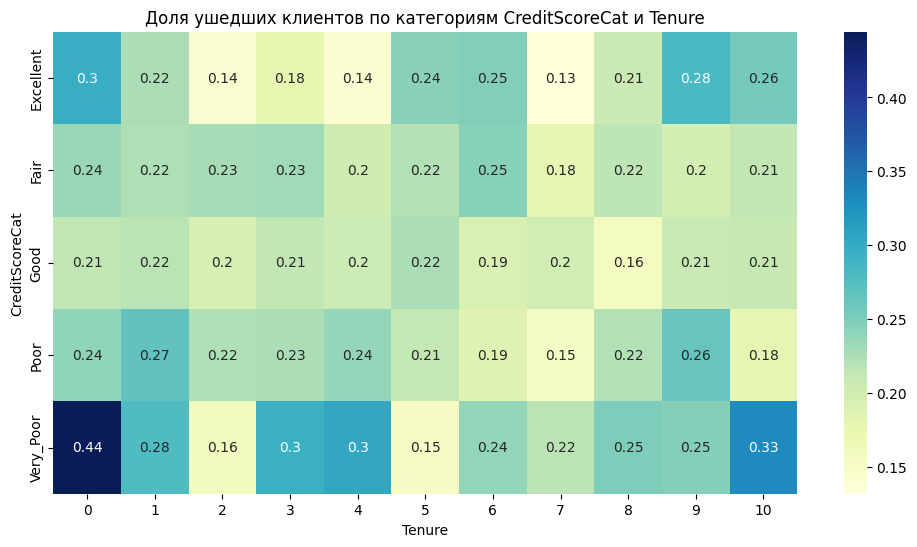

In [35]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data_df_9_10 = churn_data_df
churn_data_df_9_10['CreditScoreCat'] = churn_data_df_9_10['CreditScore'].apply(get_credit_score_cat)

pivot_table = churn_data_df_9_10.pivot_table(
    index='CreditScoreCat',  # Строки
    columns='Tenure',  # Столбцы
    values='Exited',  # Значение
    aggfunc='mean'  # Функция агрегации (среднее значение)
)

# Создаем тепловую карту с аннотациями
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Доля ушедших клиентов по категориям CreditScoreCat и Tenure')
plt.show()

Ответ на задание 9.10.      
Первое место по неблагонадёжности занимают клиенты самым низким рейтингом "Poor" и "Very_Poor", они уходят в первый год обслуживания;        
При рейтинге выше  лояльность значительно повышается.       
При этом стоит отметить что доля таких клиентов у банка очень мала.